In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import sys
import warnings                                 # `dnd` mode
warnings.filterwarnings('ignore')

In [59]:
# Import necessary libraries

#from simple_colors import *                     # print text formatting 
from pprint import pprint                       # import petty print
import numpy as np                              # Import Numpy library for vectors, matrix, algebra
import pandas as pd                             # Import Pandas library for dataframe preparation and manipulation
import statistics                               # Import Statistics library for basic statistics, if required
import statsmodels.api as sm                    # Statsmodel is an essential module to conduct statistical tests
from scipy import stats                         # Scipy builds on Numpy for mathematical computation
from scipy.stats import zscore                  # Import Zscore function from Scipy Stats module
from scipy.stats import variation               # Compute coefficient of variation

import matplotlib.pyplot as plt                 # Import Pyplot from matplotlib
import seaborn as sns                           # Import Seaborn library for data visualization
sns.set(color_codes = True)                     # data visualization

from sklearn.preprocessing import LabelEncoder   # Import library to encode categorical data
from sklearn.preprocessing import StandardScaler # Standard Scaler will be used for scaling the data
from sklearn.neighbors import LocalOutlierFactor # To detect outliers using Local Outlier Factor
from sklearn import model_selection          
from sklearn.model_selection import train_test_split # Importing train test split for splitting data from Scikit Learn
from sklearn.model_selection import GridSearchCV     # Hyperparameter tuning through looping
from sklearn.pipeline import Pipeline                # Assemble multiple steps for crossvalidation
from sklearn import metrics                          # Importing Metrics for Accuracy Testing from Scikit Learn
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix #import the accuracy classes from the library. 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [60]:
# Set display of tables

pd.set_option("display.max_column", None) # set display of all columns
pd.options.display.max_colwidth = 150     # increase column width to display large text
pd.set_option("display.max_rows", None) # set display of all rows

In [61]:
%matplotlib inline

In [62]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/frequency_domain_features_train.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_domain_features_train.csv")

In [63]:
# df_test1 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/frequency_domain_features_test.csv")
# df_test2 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/heart_rate_non_linear_features_test.csv")
# df_test3 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/time_domain_features_test.csv")

In [64]:
df = pd.merge(df1, df2, on='uuid')

In [65]:
df = pd.merge(df, df3, on='uuid')

In [66]:
df.shape

(369289, 37)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

In [68]:
df = df.drop(["uuid", "datasetId"], axis =1)

In [69]:
df = pd.get_dummies(df, prefix=['condition'], prefix_sep='_', dummy_na=False, columns=['condition'])

In [70]:
indep_var = df.drop(['HR'], axis = 1)

In [71]:
col = indep_var.columns.to_list()

In [72]:
# Setting up the data. 
# K is fixed by passing the n_neighbors parameter with integer. 
# I have used the default Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 15)
#Training the model taking only independent variables
df['lof'] = lof.fit_predict(df[col])
#Getting the negative LOF score
df['negative_outlier_factor'] = lof.negative_outlier_factor_

In [73]:
# Detecting the outliers
outliers = df[df['lof'] == -1]
# Finding the number of outlier records
n_outliers = outliers.shape[0]
n_records = df.shape[0]
percent_outliers = n_outliers/n_records*100
print(round(percent_outliers, 2))

1.59


In [74]:
# Droping the outlier records to create a new dataframe df1
df = df.loc[df['lof'] >= 0]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363434 entries, 0 to 369288
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   VLF                      363434 non-null  float64
 1   VLF_PCT                  363434 non-null  float64
 2   LF                       363434 non-null  float64
 3   LF_PCT                   363434 non-null  float64
 4   LF_NU                    363434 non-null  float64
 5   HF                       363434 non-null  float64
 6   HF_PCT                   363434 non-null  float64
 7   HF_NU                    363434 non-null  float64
 8   TP                       363434 non-null  float64
 9   LF_HF                    363434 non-null  float64
 10  HF_LF                    363434 non-null  float64
 11  SD1                      363434 non-null  float64
 12  SD2                      363434 non-null  float64
 13  sampen                   363434 non-null  float64
 14  higu

In [76]:
df = df.drop(["lof", "negative_outlier_factor"], axis = 1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363434 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   VLF                      363434 non-null  float64
 1   VLF_PCT                  363434 non-null  float64
 2   LF                       363434 non-null  float64
 3   LF_PCT                   363434 non-null  float64
 4   LF_NU                    363434 non-null  float64
 5   HF                       363434 non-null  float64
 6   HF_PCT                   363434 non-null  float64
 7   HF_NU                    363434 non-null  float64
 8   TP                       363434 non-null  float64
 9   LF_HF                    363434 non-null  float64
 10  HF_LF                    363434 non-null  float64
 11  SD1                      363434 non-null  float64
 12  SD2                      363434 non-null  float64
 13  sampen                   363434 non-null  float64
 14  higu

In [78]:
# Target and feature separation in original dataframe
X = df.drop(labels= "HR" , axis = 1) 
y = df["HR"]

In [79]:
scaler = StandardScaler()                 # defining scaler
X = scaler.fit_transform(X)   # scale the training data

In [80]:
pca = PCA(n_components=35)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Cumulative explained variance')

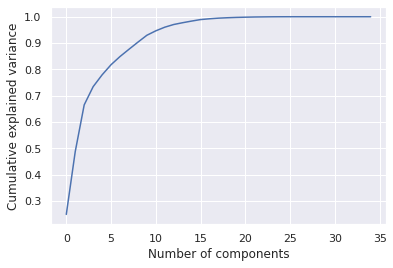

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [82]:
NCOMPONENTS = 16
pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X)

In [83]:
pca_std = np.std(X_pca_train)
pca_std

1.4919362673259933

In [84]:
def mlp_model():
    model = Sequential()
    model.add(Dense(36, input_dim = NCOMPONENTS, activation = "relu"))
    model.add(Dense(16, activation = "relu"))
    model.add(Dense(4, activation = "relu"))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(GaussianNoise(pca_std))
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model

In [85]:
estimator = KerasRegressor(build_fn=mlp_model, epochs=30, batch_size=256, verbose=True)

In [86]:
kfold = KFold(n_splits=5, random_state=42)
results = cross_val_score(estimator, X_pca_train, y, cv=kfold)
print("Results: %.3f (%.3f) MSE" % (results.mean(), results.std()))

Epoch 1/30
1136/1136 [==============================] - 2s 1ms/step - loss: 2469.8481
Epoch 2/30
1136/1136 [==============================] - 1s 1ms/step - loss: 16.5598
Epoch 3/30
1136/1136 [==============================] - 1s 1ms/step - loss: 7.0029
Epoch 4/30
1136/1136 [==============================] - 1s 1ms/step - loss: 4.3972
Epoch 5/30
1136/1136 [==============================] - 1s 1ms/step - loss: 3.4879
Epoch 6/30
1136/1136 [==============================] - 1s 1ms/step - loss: 3.0522
Epoch 7/30
1136/1136 [==============================] - 1s 1ms/step - loss: 2.8641
Epoch 8/30
1136/1136 [==============================] - 2s 1ms/step - loss: 2.7514
Epoch 9/30
1136/1136 [==============================] - 1s 1ms/step - loss: 2.6883
Epoch 10/30
1136/1136 [==============================] - 1s 1ms/step - loss: 2.6588
Epoch 11/30
1136/1136 [==============================] - 2s 1ms/step - loss: 2.6296
Epoch 12/30
1136/1136 [==============================] - 1s 1ms/step - loss: 2.59

In [88]:
estimator.fit(X_pca_train, y)
prediction = estimator.predict(X_pca_train)

Epoch 1/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2176.5164
Epoch 2/30
1420/1420 [==============================] - 2s 1ms/step - loss: 13.8237
Epoch 3/30
1420/1420 [==============================] - 2s 1ms/step - loss: 4.7822
Epoch 4/30
1420/1420 [==============================] - 2s 1ms/step - loss: 3.3257
Epoch 5/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.9400
Epoch 6/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.7298
Epoch 7/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.6608
Epoch 8/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.5866
Epoch 9/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.5599
Epoch 10/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.5198
Epoch 11/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.5192
Epoch 12/30
1420/1420 [==============================] - 2s 1ms/step - loss: 2.50

In [89]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y,prediction))

0.3988296265022698


In [90]:
df_test1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/frequency_domain_features_test.csv")
df_test2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_rate_non_linear_features_test.csv")
df_test3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_domain_features_test.csv")

In [91]:
df_test = pd.merge(df_test1, df_test2, on='uuid')
df_test = pd.merge(df_test, df_test3, on='uuid')


In [92]:
df_test = df_test.drop(["datasetId"], axis =1)
_id = df_test["uuid"]
test = df_test.drop(["uuid"], axis = 1)

In [93]:
test = pd.get_dummies(test, prefix=['condition'], prefix_sep='_', dummy_na=False, columns=['condition'])
test.shape

(41033, 36)

In [94]:
X_scale = scaler.transform(test)   # scale the training data
X_test = pca.transform(X_scale)
HR = estimator.predict(X_test)

161/161 [==============================] - 0s 825us/step


In [95]:
HR = pd.DataFrame(data=HR.flatten(),columns=["HR"])
HR.head()

,HR
0,64.107483
1,72.939133
2,68.646965
3,60.540607
4,77.262375


In [96]:
output = pd.concat([_id, HR], axis = 1)
output.head()

,uuid,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.107483
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,72.939133
2,cb573d3a-c767-4556-b32e-ad8c08ded214,68.646965
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.540607
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.262375


In [97]:
output.to_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv", index = False)

In [98]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv")